In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Neural Networks

Welcome to the third lecture of the Kaggle Competition.

An Artificial Neural Network (ANN), or just Neural Network, is a computational model inspired by the way biological neural networks in the human brain process information. Artificial Neural Networks have generated a lot of excitement in Machine Learning research and industry, thanks to many breakthrough results in speech recognition, computer vision and text processing.


Today we’ll be going through the background of how a Neural Network works and how to create your own for the Kaggle competition.

# What are Neural Networks?
Neural networks derive their name from the neural network we have in our head, our brain. In a highly simplified model, our brain is a collection of neurons that receives electrical input signals from dendrites, outputting electrical signals via a single axon. Each neuron sends signals along a single axon and connects with other dendrites. Neural networks attempt to model this by having artificial layers neurons that perform minor tasks, then communicate from layer to layer. The collection of neurons operate together to begin to understand the raw input in layers - in each layer, the neurons summarize the data a little bit further, until they finally arrive at a single label.
That sums up the feed forward Neural Network, which is what we'll be exploring today.

<img src= "feedforward.png">


In the diagram of a neural network shown above, the circles represent nodes, or neurons, and the arrows represent the communication between nodes. These nodes are feed forward since the information propagates from the input on the left side through intermediate calculations to a final output layer. Our goal in machine learning is to take a set of inputs $X$ and approximate some function $f^*(X)$. We are given $(X_i,y_i)$ pairs where $y\approx f^*(x)$ is an approximation of the example relationships between $X_i$'s and $y_i$'s. These feed-forward models attempt to model $f^*(x)$ by composing multiple functions together, such as $f^*(x)=f^{(2)}(f^{(1)}(x))$ in the neural network above. Notice that $f^{(1)}(x)$ and $f^{(2)}(x)$ are the middle layer in the model, but it is never used except in intermediate states, thus it is known as a hidden layer.

## The Single Node

The basic unit of computation in a neural network is the known as a node or unit. It receives input from some other nodes, or from an external source and computes an output. Each input has an associated weight (w), which is assigned on the basis of its relative importance to other inputs. The node applies a function f (defined below) to the weighted sum of its inputs as shown in Figure 1 below:

<img src= "single_node.jpg">


The above network takes numerical inputs X1 and X2 and has weights w1 and w2 associated with those inputs. Additionally, there is another input 1 with weight b (called the Bias) associated with it. The output Y from the neuron is computed as shown in the Figure 1. The function f is non-linear and is called the Activation Function. The purpose of the activation function is to introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these nonlinear representations. We'll learn more about this later.

To delve more into the math, each neuron outputs a specific value, denoted as $x_i$. This neuron then has separate weights for each further neuron it connects to and multiplies each weight to $x_i$ to serve as the input to a new neuron deeper in the model. In the image above, we have two inputs $x_1,x_2$ from two neurons. Each individual arrow from neuron to neuron has a unique weight, and each weight gets multiplied by the output axon value from the neuron. To determine the output of the blue neuron, we take the sum of the $x_iw_i$, then apply some activation function $f$. This gives us $f\left(\sum_i w_ix_i + b\right)$. The added $b$ term is not too important. $b$ is essentially the bias term, a constant value we add.

# An Introduction to Activation Functions
Consider each activation function in the neural network to be linear of the form$f^{(i)}(x)=a_ix+b_i$. Then if we compose many of these linear functions together, we would get some $f(x)=f^{(n)}(f^{(n-1)}(\ldots f^{(1)}(x)\ldots ))=ax+b$ for some $a,b$. Since the composition of multiple linear functions is always a linear function, we essentially will conduct linear regression. Without the inducement of nonlinearities, our model can only do as well as linear regression. So what activation functions can we use instead of linear functions?

There are many common activation functions.

Sigmoid is useful if you want only positive numbers. However, it has fallen out of popularity recently because it causes gradients to vanish. When a neruon's activation saturates close to 0 or 1, the gradient will be really close to 0. During backpropogation this causes the signal to be lost. Also, because it is not 0-centered, it has a greater chance for gradient updates to go far in either direction.
<img src = "sigmoid.png">
$\textit{tanh}$ has many advantages over sigmoid since the activation function is centered at zero, and can output negative numbers. In practice, $\textit{tanh}$ is preferred over sigmoid.
<img src = "tanh.png">
Rectified Linear Units (ReLU) is one of the most common activation functions used. It is simply the function $\max(0,x)$, essentially thresholding at zero.
<img src = "relu.png">

## Feedforward 
The feedforward neural network was the first and simplest type of artificial neural network devised. It contains multiple neurons (nodes) arranged in layers. Nodes from adjacent layers have connections or edges between them. All these connections have weights associated with them.
An example of a feedforward neural network is shown in Figure 3.


<img src= "detailed_feedforward.png">


A feedforward neural network can consist of three types of nodes:
    
1.	Input Nodes – The Input nodes provide information from the outside world to the network and are together referred to as the “Input Layer”. No computation is performed in any of the Input nodes – they just pass on the information to the hidden nodes.
2.	Hidden Nodes – The Hidden nodes have no direct connection with the outside world (hence the name “hidden”). They perform computations and transfer information from the input nodes to the output nodes. A collection of hidden nodes forms a “Hidden Layer”. While a feedforward network will only have a single input layer and a single output layer, it can have zero or multiple Hidden Layers.
3.	Output Nodes – The Output nodes are collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.

In a feedforward network, the information moves in only one direction – forward – from the input nodes, through the hidden nodes and to the output nodes.

Input Layer: The Input layer has any number of input nodes. The Bias node can also be varied, but for this example I’m labeling it as 1. As discussed above, no computation is performed in the Input layer, so the outputs from nodes in the Input layer are 1, X1 and X2 respectively, which are fed into the Hidden Layer.

Hidden Layer: The Hidden layer has the same number of nodes as the Input, with the Bias node having an output of 1. The output of the other two nodes in the Hidden layer depends on the outputs from the Input layer (1, X1, X2) as well as the weights associated with the connections (edges). Figure 4 shows the output calculation for one of the hidden nodes (highlighted). Similarly, the output from other hidden node can be calculated. Remember that f refers to the activation function. These outputs are then fed to the nodes in the Output layer.


<img src= "summation_feedforward.png">


Figure 4: a neural network having one hidden layer

Output Layer: The Output layer has two nodes which take inputs from the Hidden layer and perform similar computations as shown for the highlighted hidden node. The values calculated (Y1 and Y2) as a result of these computations act as outputs of the Neural Network.
Given a set of features X = (x1, x2, …) and a target y, a Neural Network can learn the relationship between the features and the target, for either classification or regression.


Let’s take an example to better understanding. Suppose we have the following student-marks dataset:


## Training our NN: The Back-Propagation Algorithm

Backward Propagation of Errors, is one of the several ways in which an artificial neural network (NN) can be trained. It is a supervised training scheme, which means, it learns from labeled training data (there is a supervisor, to guide its learning).
To put in simple terms, backward propagation is like “learning from mistakes“. The supervisor corrects the NN whenever it makes mistakes.

An NN consists of nodes in different layers; input layer, intermediate hidden layer(s) and the output layer. The connections between nodes of adjacent layers have “weights” associated with them. The goal of learning is to assign correct weights for these edges. Given an input vector, these weights determine what the output vector is.
In supervised learning, the training set is labeled. This means, for some given inputs, we know the desired/expected output (label).

Algorithm:
Initially all the edge weights are randomly assigned. For every input in the training dataset, the NN is activated and its output is observed. This output is compared with the desired output that we already know, and the error is “propagated” back to the previous layer. This error is noted and the weights are “adjusted” accordingly. This process is repeated until the output error is below a predetermined threshold.
Once the above algorithm terminates, we have a “learned” NN which, we consider is ready to work with “new” inputs. This NN is said to have learned from several examples (labeled data) and from its mistakes (error propagation).

We look at a specific example of a deep learning architecture throught the MNIST Dataset, which is sort of the hello world example in deep learning.

# How Neural Networks Learn
The general idea in machine learning is given a model and dataset, we would like to minimize the loss or error of the model as it compares to the actual labels of the data. In deep learning, this is acheived by tweaking the weights of the neural network as we incrementally train on the train data to predict the misclassified numbers better. This leads us to two major questions: $(1)$ what is the loss function of our model, and $(2)$ how do we update the weights of our model as we train it?

# Loss Function for Classification
As a naive attempt at creating a loss function, we could have the loss be $0$ for correctly classifying the number and $1$ for incorrect classification. However, this is a bit naive because we lose a lot of information on what the correct answer is. A better loss function for classification is cross entropy loss. The formula may look a bit complex but the idea is simple. For a particular label $y$ and prediction distribution $\hat{y}$, our error is: $$z(\hat{y}) = -\sum_k y_k \log {\hat {y}}_k$$ where $y_k$ is an indicator of the correct label and $\hat{y}_k$ is our model's guess at how likely label $k$ is correct.

For example, if the current image is actually a $3$, then $y_3=1$ and $y_i=0$ for all $i\neq 3$. The $\hat y$ represents the probability distribution outputs from our model. Our model may classify the image as $20\%$ likely to be $1$, $30\%$ likely to be $2$, $50\%$ likely to be $3$, and $0%$ for the rest. The error would be the compute to be $z(\hat y) = -\log(0.5)$.

The key thing to notice about the cross-entropy loss is that the loss drastically increases as the probability for the correct label approaches zero. If we output a very low probability for the correct class, the logarithm approaches very large negative values, resulting in a large loss. On the other hand, if we output a very high probability close to $1$ for the correct class, the loss is almost zero since $\log 1 = 0$.

# Back Propagation
Back propagation is the key to training neural networks. To explain back propagation, we may begin with an analogy. Consider that today after eating, you get a bad stomach ache and suspect that you got food poisoning. A logical step would be to assign blame to the most recent foods you ate, placing more blame on the more suspect foods such as raw fish, raw meats, etc. We intuitively place the blame on the more recent things, then consider the causes farther back such as the leftover salad you left in the fridge for a week or the spoiled milk from that boba place you knew you shouldn't have gone to.

Back propagation is similar, we distribute the loss through the model beginning with the layers closer to the output, and propagate the loss back. The exact math is a bit complex as it involves a lot of derivatives, but the general idea is relatively simple. The more suspicious or the more the neuron contributed to the incorrect prediction, the more we penalize it to be correct.

# Understanding the MNIST Dataset
Take a brief moment to read over the MNIST Wikipedia article.

The MNIST dataset consists of 70k images, 60k of which are considered the training set, with the remaining 10k for test. Each data entry $X_i$ in the MNIST dataset is a $28\times28$ pixel image of a single handwritten digit, and each is labeled with the associated digit between $0$ and $9$, denoted as $y_i$. Our goal is to design a model that learns a classification scheme from the 60k training images $\{X_i\}$ and their labels $\{y_i\}$, and then perform well in predicting which digit is represented in each test image.

### Check for Understanding
>Why is the MNIST dataset split into a training set and test set? <br>
>How many different classes (e.g. different kinds of labels) are present in the MNIST dataset? <br>
> Can you think of a particular pair of numbers that might be particularly difficult to differentiate, or prone to misclassification with each other?

# Acquiring the MNIST Dataset
The MNIST data actually comes packaged with keras, a package which we will be using later to implement our deep learning model, by default. So, let's install keras and take a look at the dataset.



In [53]:
from keras.datasets import mnist
num_classes = 10
# The data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


# Structure of MNIST
We can verify that the data entries $X$ of train consist of $60,000$ images of $28\times28$ pixels in size. These entries come with labels $y_i$, one for each image $X_i$. A similar setup can be seen for the $10,000$ entries in test.

Each image $X_i$ is represented by a two-dimensional array (i.e. $28\times28$ matrix) of grayscale intensities ranging from $[0,255]$ to indicate the darkness of the ink at each pixel. $0$ represents a pixel that is completely white, and $255$ represents a pixel that is completely black.

## Check for understanding
> What does each $y_i$ represent, with respect to the corresponding $X_i$? What are the possible values for $y_i$?

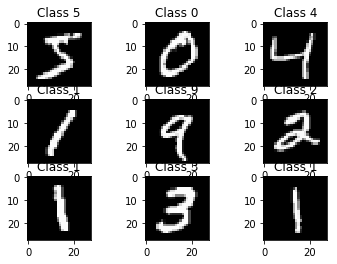

In [26]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Data Preprocessing
The model we are working with requires flatten our two-dimensional arrays of $28\times28$ pixels into $28\times28=784$-dimensional vectors, and then change the units of the grayscale values to vary from $[0,1]$ rather than $[0,255]$ (the reason for this will be explained later). For our label vector $y$, we use to_categorical to one-hot-encode our labels - this command transforms our scalars $y_i \in [0,9]$ into binary class vectors $y'_i$.

In [56]:
# reshape 2d (28x28) image data into 1d vectors (28x28 = 784-d vectors)
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [54]:
# convert class labels into vectors. Ie 3 -> [0,0,0,1,0,0,0,0,0,0]
y_train_oe = keras.utils.to_categorical(y_train, num_classes)
y_test_oe = keras.utils.to_categorical(y_test, num_classes)

# Intro to Keras

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## The Squential Model
The Sequential Model is a Linear Stack of Layers. You can add layers with the .add() method

In [30]:
model = Sequential()

## Specifying the input shape
The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 

In [31]:
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

## Compilation
Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

*   An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. 
*   A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.

*   A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.


In [32]:
# For a mean squared error regression problem
model.compile(optimizer='sgd', #How to Learn
              loss='mse') #What to Learn
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
Now that the model has been fully defined with loss-function and optimizer, we can train it. This function takes numpy-arrays and performs the given number of training epochs using the given batch-size. An epoch is one full use of the entire training-set. So for 10 epochs we would iterate randomly over the entire training-set 10 times

In [57]:
model.fit(x=X_train, y=y_train_oe, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.9046 - acc: 0.9407

# Evaluation
Now that the model has been trained we can test its performance on the test-set. This also uses numpy-arrays as input.

In [58]:
result = model.evaluate(x=X_test, y=y_test_oe)

10000/10000 [==============================] - 0s 35us/step - ETA: 0s


# Prediction
We can also predict the classification for new images. We will just use some images from the test-set but you could load your own images into numpy arrays and use those instead.

# Examples of Mis-Classified Images
We can plot some examples of mis-classified images from the test-set.

First we get the predicted classes for all the images in the test-set:

In [59]:
y_pred = model.predict(x=X_test)

Then we convert the predicted class-numbers from One-Hot encoded arrays to integers.

In [60]:
cls_pred = np.argmax(y_pred, axis=1)

Plot some of the mis-classified images.

In [66]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((28, 28)), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [70]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_test)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_test[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

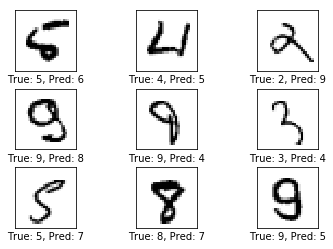

In [71]:
plot_example_errors(cls_pred)

# Regression (Housing Dataset)

## Homework: Create your own neural network for the house price dataset
>What Loss function do we use for regression tasks? <br>
>What should the last layer look like?

In [43]:
# Import cleaned dataset